In [2]:
%matplotlib inline

import sys
sys.path.append('../src/')

import glob
import warnings

import numpy as np
import pandas as pd
import xarray as xr

from scipy.optimize import curve_fit, minimize

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm
import hvplot.xarray

from sklearn.linear_model import LinearRegression

from epsilon_tools import *
from tools import str2date, avg_funs, load_matfile

import warnings
warnings.simplefilter("ignore",category=FutureWarning)
warnings.simplefilter("ignore",category=RuntimeWarning)

# set up figure params
sns.set(style='ticks', context='poster', palette='colorblind')
mpl.rc('figure', dpi=100, figsize=[12, 6])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

In [29]:
mat = load_matfile('../data/drifters/157780.mat')
df1 = pd.DataFrame()
df1['lat'] =  mat['LAT']
df1['lon'] =  mat['LONG']
df1['time'] =  pd.to_datetime(mat['GPS_TIME_s'])

In [30]:
mat = load_matfile('../data/drifters/157781.mat')
df2 = pd.DataFrame()
df2['lat'] =  mat['LAT']
df2['lon'] =  mat['LONG']
df2['time'] = pd.to_datetime( mat['GPS_TIME_s'])

In [106]:
mask =  (df1.time>'2016-08-25') & (df1.time<'2016-09-03')

In [107]:
df1.lat.values[-1]

38.073200000000014

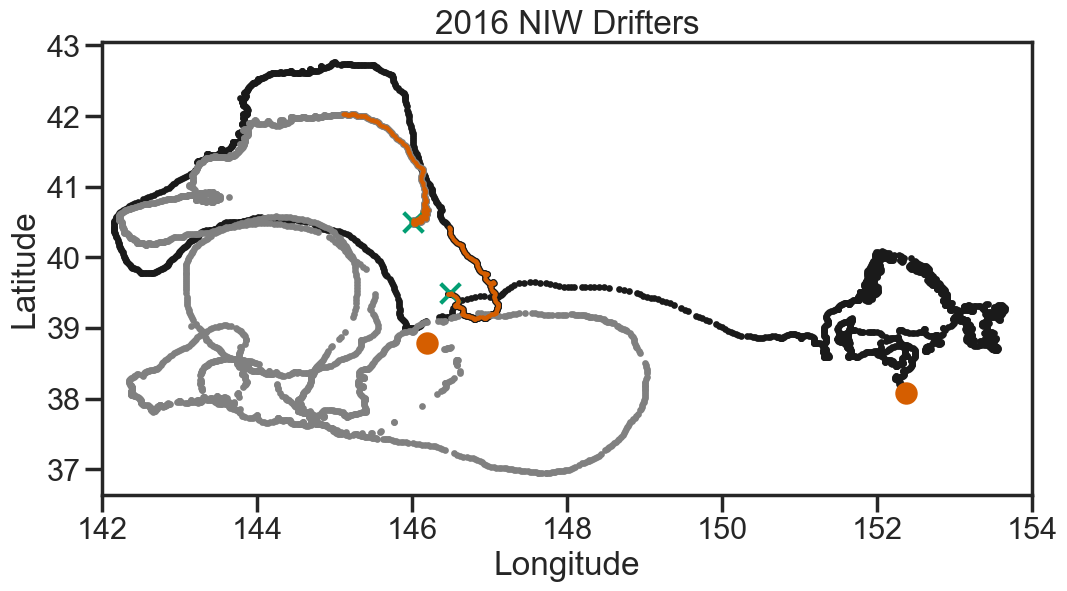

In [109]:
plt.scatter(df1.lon[0],df1.lat[0],s=200, c='g', marker='x', zorder=11)
plt.scatter(df1.lon,df1.lat,s=8, c='k')
plt.scatter(df1.lon.where(mask),df1.lat.where(mask),s=1, c='r', zorder=11)
plt.scatter(df1.lon.values[-1],df1.lat.values[-1],s=200, c='r', marker='o', zorder=11)

plt.scatter(df2.lon[0],df2.lat[0],s=200, c='g', marker='x', zorder=11)
plt.scatter(df2.lon,df2.lat,s=8, c='gray')
plt.scatter(df2.lon.where(mask),df2.lat.where(mask),s=1, c='r', zorder=11)
plt.scatter(df2.lon.values[-1],df2.lat.values[-1],s=200, c='r', marker='o', zorder=11)
plt.xlim(142,154)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2016 NIW Drifters')

plt.savefig('../figures/drifter_traj.pdf')

In [55]:
df1.time[0]

Timestamp('2016-08-24 19:00:51')

In [56]:
df2.time[0]

Timestamp('2016-08-25 05:01:01')